This file demonstrates how to use then sensitivity analysis app in GUMPS that ues SALib. For an explanation of exactly what the parameters mean please refer to https://salib.readthedocs.io/en/latest/index.html.

First import the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from gumps.apps.sensitivity import SensitivityApp
from gumps.solvers.sensitivity import SensitivitySolverParameters


from gumps.studies.ackley_batch_study import AckleyBatchStudy

%matplotlib inline

Next we need to define the model we want to test. The model needs to implement the Batch interface and in this case we are going to use the Ackley function.

In [2]:
batch = AckleyBatchStudy(model_variables={})

The sensitivity code generates one column per variable and the Ackley function needs x to be an array so we need a pre_processing_function to handle the conversion

In [3]:
def pre_processing_function(input_data: pd.DataFrame):
    "pre-process the data"
    input_data_processed = {}
    input_data_processed['x'] = list(np.column_stack([input_data.x1, input_data.x2, input_data.x3, input_data.x4]))
    input_data_processed['a'] = input_data.a
    input_data_processed['b'] = input_data.b
    input_data_processed['c'] = input_data.c

    return pd.DataFrame(input_data_processed)

We also need a post processing function to convert the output of the Ackley function to a single column. 

In [4]:
def processing_function(frame:pd.DataFrame) -> pd.DataFrame:
    "processing function to get the total from the dataframe"
    return pd.DataFrame(frame['total'])

Create the sensitivity analysis setup

In [5]:
lower_bound = pd.Series({'x1': -4, 'x2': -4, 'x3':-4, 'x4':-4, 'a':19, 'b':0.05, 'c': np.pi})
upper_bound = pd.Series({'x1': 4, 'x2': 4, 'x3':4, 'x4':4, 'a':20, 'b':0.1, 'c':2 * np.pi})
parameters = SensitivitySolverParameters(lower_bound=lower_bound,
                                        upper_bound=upper_bound,
                                        sample_power=8)

Next we can create the sensitivity app

In [6]:
app = SensitivityApp(parameters=parameters,
                                processing_function=processing_function,
                                directory=None,
                                batch=batch,
                                pre_processing_function=pre_processing_function)

We can now run the sensitivity analysis

In [7]:
app.run()

Lets look at the results. First we can look at the dataframes which show the first order, second order, and interactions between terms.

In [8]:
results = app.results()

print(results['ST'])
print(results['S1'])
print(results['S2'])

          ST   ST_conf
x1  0.188323  0.035166
x2  0.177064  0.039737
x3  0.188707  0.047818
x4  0.180531  0.033972
a   0.002529  0.000557
b   0.341554  0.063238
c   0.141722  0.031735
          S1   S1_conf
x1  0.103523  0.074219
x2  0.111905  0.076374
x3  0.045226  0.063311
x4  0.182376  0.059975
a   0.001495  0.010044
b   0.324352  0.087468
c   0.020926  0.066619
                S2   S2_conf
(x1, x2)  0.057054  0.115157
(x1, x3)  0.047710  0.104560
(x1, x4)  0.054345  0.106695
(x1, a)   0.040287  0.101538
(x1, b)   0.038459  0.111325
(x1, c)   0.055198  0.110984
(x2, x3)  0.032500  0.105431
(x2, x4) -0.080611  0.104651
(x2, a)  -0.056112  0.101902
(x2, b)  -0.020031  0.115285
(x2, c)  -0.013363  0.099355
(x3, x4)  0.085095  0.112502
(x3, a)   0.094744  0.101344
(x3, b)   0.074778  0.114474
(x3, c)   0.124135  0.101575
(x4, a)  -0.044260  0.094194
(x4, b)  -0.050250  0.106146
(x4, c)  -0.010295  0.102441
(a, b)   -0.000883  0.018692
(a, c)    0.002801  0.014197
(b, c)   -0.005022  0.1

We can also create a sensitivity plot

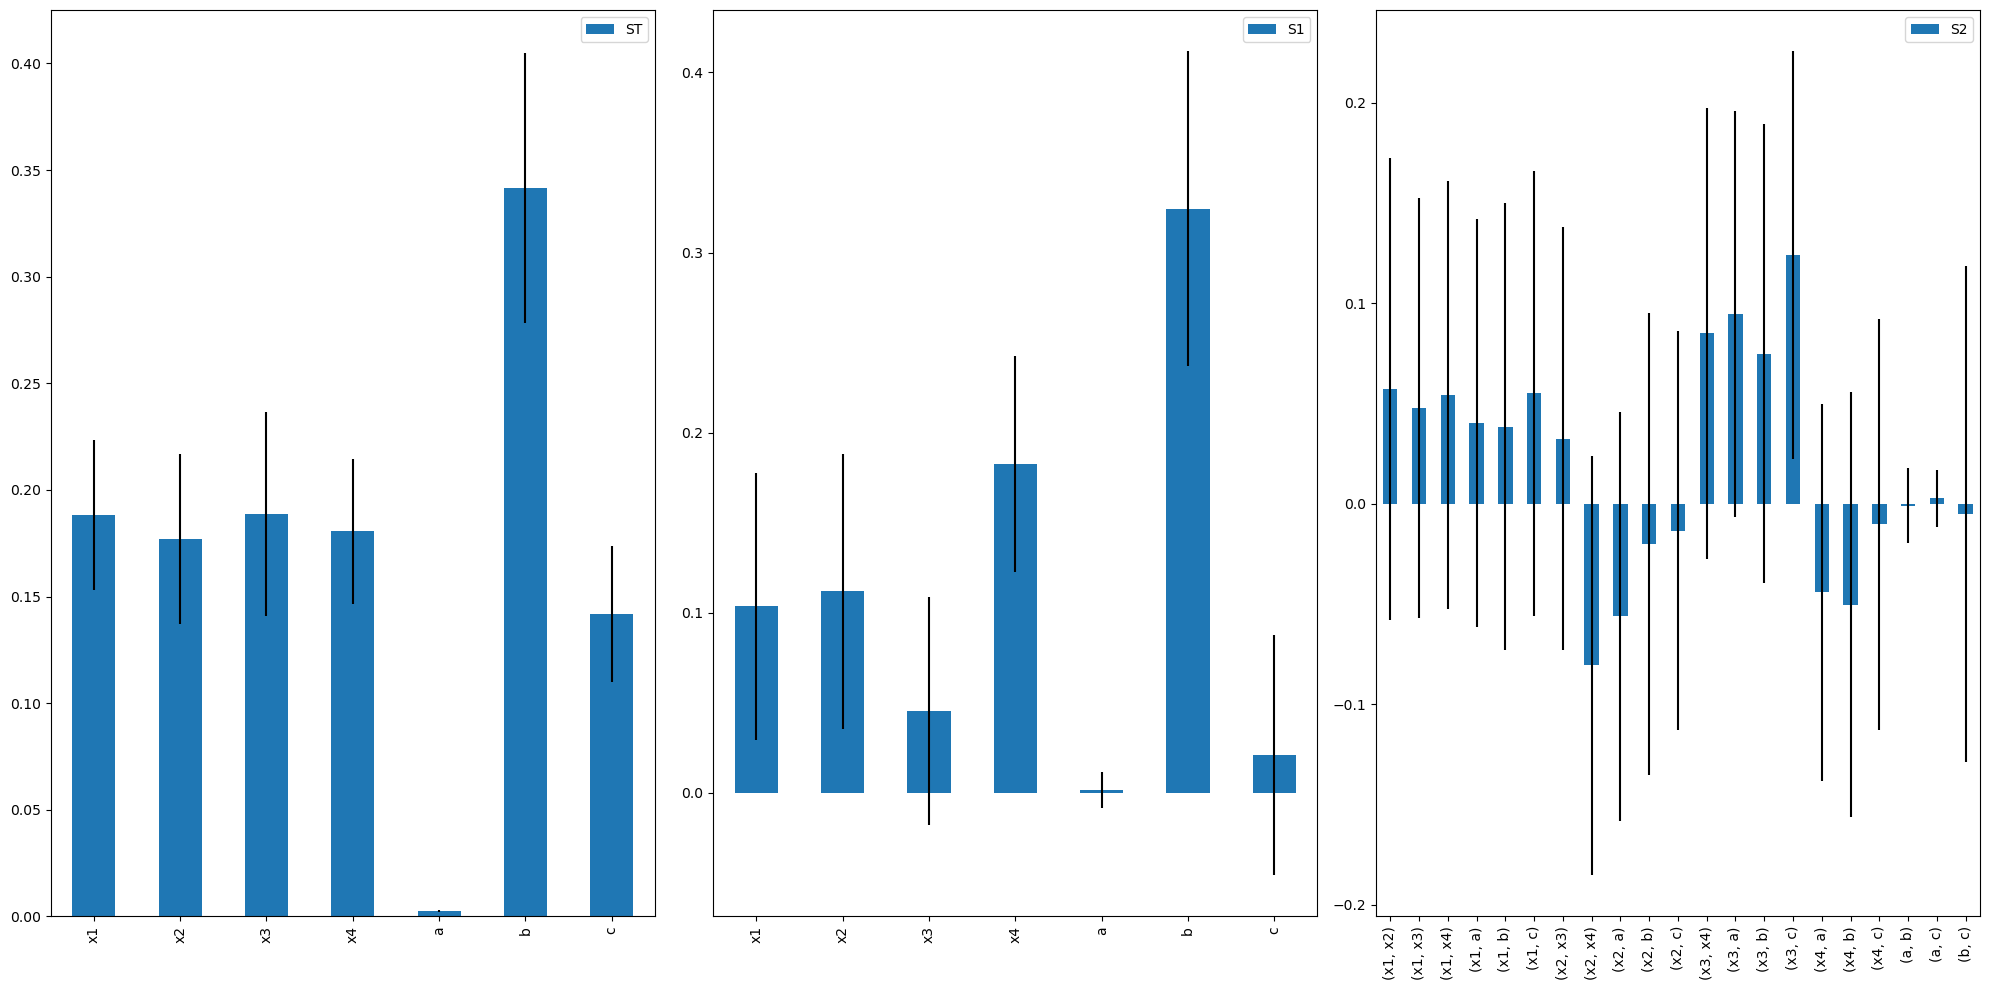

In [9]:
app.plot()
plt.gcf().set_size_inches(20, 10)
plt.tight_layout()